# Student Performance Analysis

# Objective
Analyze student academic performance and identify factors influencing final grades.

In [ ]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/student-performance-data/student_data.csv


In [ ]:
df = pd.read_csv("/kaggle/input/student-performance-data/student_data.csv")


In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.info()

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Data Understanding
The dataset contains 395 student records with demographic, academic, and lifestyle features.
No missing values were observed in the dataset.


In [ ]:
df['average_score']=df[['G1','G2','G3']].mean(axis=1)

In [ ]:
df[['G1','G2','G3','average_score']].head()

,G1,G2,G3,average_score
0,5,6,6,5.666667
1,5,5,6,5.333333
2,7,8,10,8.333333
3,15,14,15,14.666667
4,6,10,10,8.666667


In [ ]:
df[['G1', 'G2', 'G3']].mean()


G1    10.908861
G2    10.713924
G3    10.415190
dtype: float64

In [ ]:
df.sort_values(by='average_score', ascending=False).head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,average_score
47,GP,M,16,U,GT3,T,4,3,health,services,...,2,2,1,1,2,4,19,19,20,19.333333
110,GP,M,15,U,LE3,A,4,4,teacher,teacher,...,5,3,1,1,4,6,18,19,19,18.666667
113,GP,M,15,U,LE3,T,4,2,teacher,other,...,5,2,1,1,3,10,18,19,19,18.666667
374,MS,F,18,R,LE3,T,4,4,other,other,...,4,4,1,1,1,0,19,18,19,18.666667
42,GP,M,15,U,GT3,T,4,4,services,teacher,...,3,3,1,1,5,2,19,18,18,18.333333


# Feature Engineering
An average_score feature was created using G1, G2 and G3 to represent overall academic perform

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


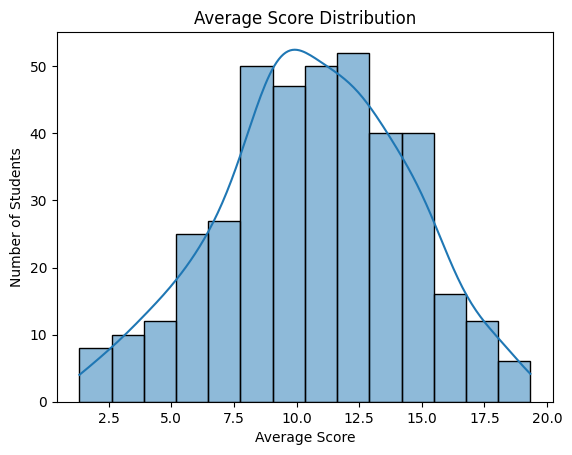

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['average_score'], kde=True)
plt.title("Average Score Distribution")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.show()


### Insight: Average Score Distribution
The distribution of average scores is approximately normal, with most students scoring between 8 and 14.
This indicates that the majority of students show moderate academic performance, while very few students
fall into extremely low or high performance categories.


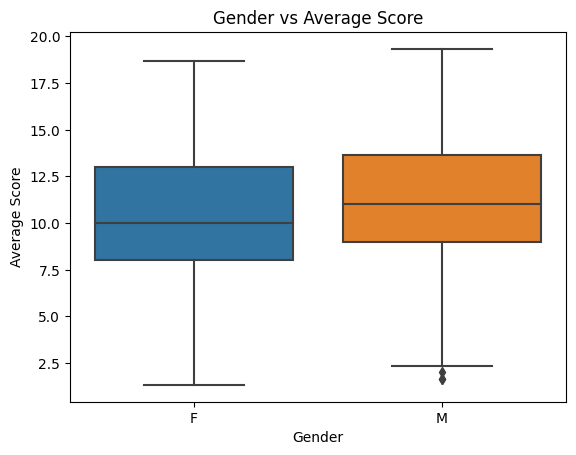

In [35]:
sns.boxplot(x='sex', y='average_score', data=df)
plt.title("Gender vs Average Score")
plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.show()


### Insight: Gender-wise Performance Comparison
The boxplot shows that female students have a slightly higher median average score compared to male students.
However, the overall score distribution for both genders overlaps significantly, indicating that performance
differences are present but not extreme.


## Key Insights
- Students who perform well in early assessments (G1 and G2) tend to score higher in the final grade (G3).
- The engineered average_score provides a stable and reliable measure of overall academic performance.
- Most students fall within a moderate performance range, with fewer students at extreme low or high scores.
- Female students show a slightly higher median performance, though overall score distributions overlap.


## Conclusion
This project analyzed student academic performance using exploratory data analysis and feature engineering.
By combining multiple assessment scores into an average_score, meaningful performance patterns were identified.
The analysis highlights the importance of consistent performance and provides insights that can help educators
identify students who may benefit from additional academic support.
